JUPYTER NOTEBOOK CREATED BY MARIO EMMANUEL RODRIGUEZ TREJO 

LAST CAPSTONE PROJECT OF IBM DATA SCIENCE PROFESSIONAL CERTICATE COURSE. PART 1 (BACKGROUND AND DATA EXPLANATION)

REFERENCES-----------

Hernández L., Lopez F., Mancini P., & Rodríguez M. (May, 2018). Propuesta metodológica para el diagnóstico empresarial de las PyMES del sector “Alimentos y Bebidas” en Cancún. Academia Journals, 10(4), Tomo 9. pp: 1463-1468. Online e-book ISSN: 1946-5351. ISBN: 978-1-939982-37-7. https://drive.google.com/drive/folders/1nVmDJmY8gBjI7gKB5EywJuNYS42Ph05c

https://www.lajornadamaya.mx/2018-11-25/Cancun--primer-lugar-con-PIB-proveniente-del-turismo

http://mim.promexico.gob.mx/work/models/mim/Documentos/PDF/mim/FE_QUINTANA_ROO_vf.pdf

https://www.linkedin.com/pulse/housing-sales-prices-venues-data-analysis-ofistanbul-sercan-y%C4%B1ld%C4%B1z/

https://www.condusef.gob.mx/Revista/index.php/usuario-inteligente/educacion-financiera/492-pymes

https://www.tripadvisor.com.mx/Restaurants-g150807-Cancun_Yucatan_Peninsula.html#EATERY_LIST_CONTENTS

BACKGROUND-------------------------------

México is the 8th visited destination of tourism in the world (UNWTO, 2016), where Quintana Roo is the sate that is at the 1st place in Tourism industry in the country. On the other hand, Small and Medium Enterprises or SMES in Mexico bring around 72% of the jobs, and get an approximate of 52% of the Gross Domestic Product (GDP) of the country (CONDUSEF, 2019), and for Quintana Roo the GDP contribution from SMES to the state is about 83% (Canirac, 2014). However, the bankruptcy index of SMES grows up to 80% after 5 years of operations (El Universal, 2016) which can be explained by many factors of failures. In Quintana Roo, the sector that has more participation in the GDP is the "food and beverages" SMES with a contribution of 21.3% in the state (INEGI,2014). According to the UNWTO, the city that gives more GDP among others is Cancun with 7.1% of GDP (La Jornada Maya, 2018).

The relevance about Tourism industry in Cancún in regards of SMES concern has worried local and foreign stakeholders on how to invest properly in this region. According to a diagnosis proposal tool for SMES of "Food and beverages"(Hernandez L., et. al, 2018), a strategic factor that could endure the life cycle of the companies is the location. Thus, in the presented capstone project I would like to define types of regions of well sited places according to the most popular restaurants in Cancún as a result of a ML algorithm, so that investors or market researches could take a decision or options to take into account from the results of the presented project.

DATA DESCRIPTION-------------------------

The data that is about to be used is the dataset of the top 100 restaurants obtained from Trip Advisor's website with its category of restaurant, the position in the website in Cancun, the category of price level (\\$=Low,\\$\\$-\\$\\$\\$=Medium,\\$\\$\\$\\$=High), and the GPS coordinates. All of the mentioned data was obtained from tripadvisor webpage, where the last update of the positions of the top 100 was on May 11th of 2019. The way of obtaining the CSV document of the dataset was manually copied from the inspected data of the webpage of each restaurant. The reason that I did not use web scrapping was that I do not know if Trip advisor will use spontaneously a different HTML structure. Therefore, I preferred to download quickly the data I needed by doing it manually.


In [85]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import re #import library to use regular expressions
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # use in case that it has not bein installed folium
#!conda install -c conda-forge geopy --yes # use in case that it has not bein installed geopy

import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import random # library for random number generation, in case that need for nandom ranges of numbers.

In [107]:
import chardet #helps to find which encoding to use for my CSV file.
with open('TOP100_one.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
    
TOP_df=pd.read_csv('TOP100_one.csv', encoding=result['encoding'])
#Created dataframe of the top 100 restaurants in cancun


In [108]:
print(TOP_df.shape)
TOP_df.head()

(100, 41)


,Top,Restaurant,Longitude,Latitude,Price_RgLv,Apto para vegetarianos,Argentina,Asiática,Bar,Brasilera,...,Opciones sin gluten,Opciones veganas,Parrilla,Peruana,Pizzería,Sopas,Sudamericana,Suiza,Sushi,Tailandesa
0,1,Sakura Sunset,21.053990,-86.781944,High,1,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
1,2,Restaurante Careyes,21.083757,-86.772370,High,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,3,Restaurante Benazuza,21.078350,-86.774950,High,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Tora Cancún,21.086130,-86.773790,High,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,5,The White Box,21.144170,-86.785180,High,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [109]:
#Create a table the unique values of the cateogries of the level of the prices 
df_u=pd.DataFrame(TOP_df.Price_RgLv.value_counts(),TOP_df.Price_RgLv.unique())
df_u.index.name = 'Lv. of the Price'
df_u

,Price_RgLv
Lv. of the Price,
High,42
Medium,49
low,9


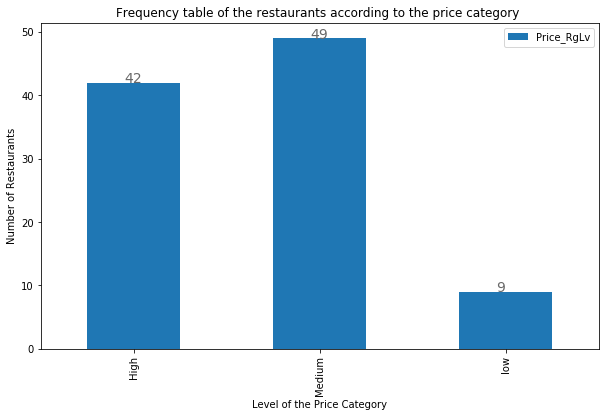

In [110]:
# Create a plot of columns of the category of the level of the prices.

ax=df_u.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Level of the Price Category') # add to x-label to the plot
plt.ylabel('Number of Restaurants') # add y-label to the plot
plt.title('Frequency table of the restaurants according to the price category ') # add title to the plot
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.2, i.get_height()+.01, \
            str(round((i.get_height()), 2)), fontsize=14,
                color='dimgrey')
plt.show()

In [127]:
df_restc = TOP_df# get restaruant categories that are already in one hot encoding df
df_restc=df_restc.drop(["Top","Restaurant",'Longitude', 'Latitude',"Price_RgLv"], axis=1)
df_restc1=df_restc.sum(axis=0)
df_restc1

Apto para vegetarianos    84
Argentina                  3
Asiática                   8
Bar                        9
Brasilera                  2
Canadiense                 1
Caribeña                  11
Centroamericana            2
Cervecería                 2
Churrasquería              5
Comida rápida              2
Contemporánea              7
De la India                1
Del sudoeste de EE.UU      1
Española                   4
Estadounidense             7
Europea                   10
Francesa                   3
Fusión                     7
Internacional             19
Italiana                  17
Japonesa                   7
Latina                    19
Mariscos                  29
Mediterránea               2
Mexicana                  43
Opciones sin gluten       69
Opciones veganas          64
Parrilla                   3
Peruana                    2
Pizzería                   6
Sopas                      3
Sudamericana               1
Suiza                      1
Sushi         

In [132]:
#Explore the venues frequencies 
df_h=pd.DataFrame(df_restc1)
df_h.head()

df_h.columns=["Num_rest"]
df_h.index.name = 'Restaurant Category'
#Filter in a descendant order.
df_h=df_h.sort_values(by='Num_rest', ascending=False)

df_h.head()
#Get the % of the frqeuencies of each venue from the total of the venues obtained.

,Num_rest
Restaurant Category,
Apto para vegetarianos,84
Opciones sin gluten,69
Opciones veganas,64
Mexicana,43
Mariscos,29


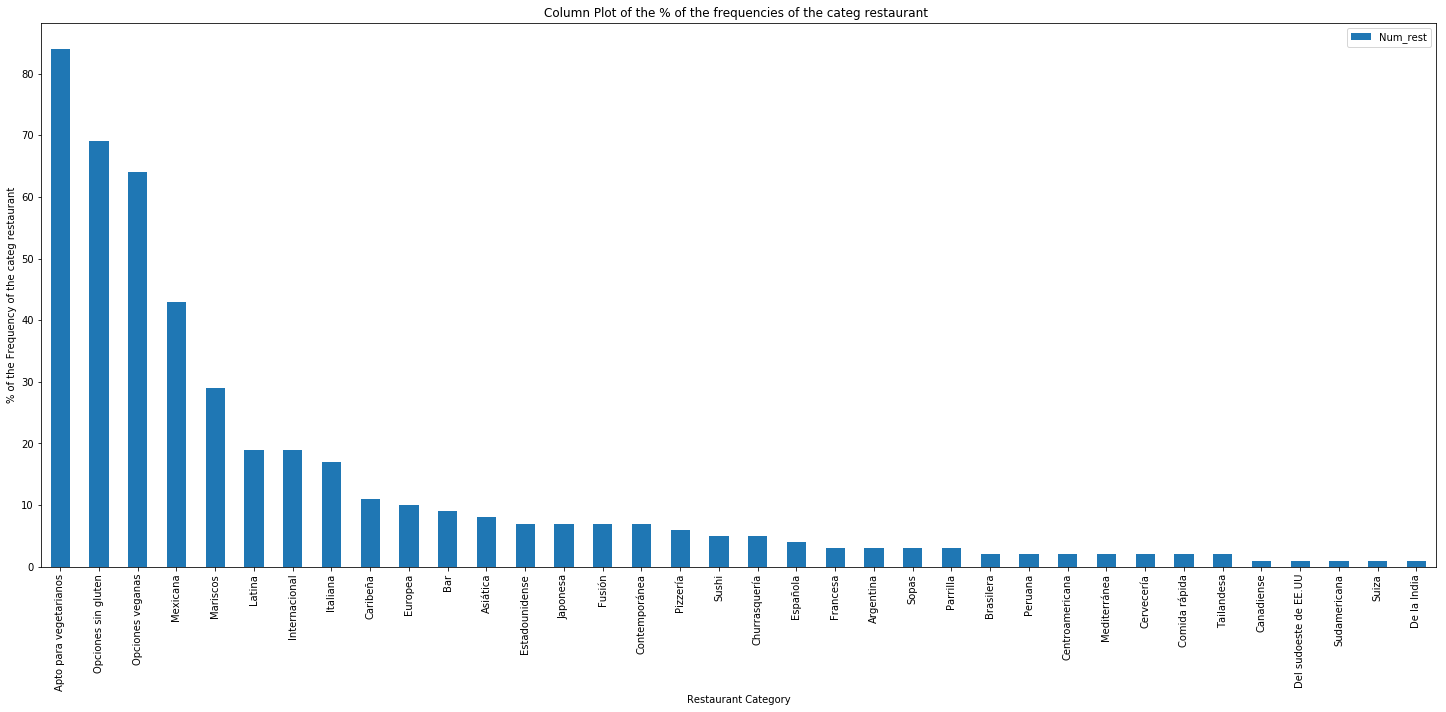

In [133]:
ay=df_h.plot(kind='bar', figsize=(25, 10))

plt.xlabel('Restaurant Category') # add to x-label to the plot
plt.ylabel('% of the Frequency of the categ restaurant') # add y-label to the plot
plt.title('Column Plot of the % of the frequencies of the categ restaurant ') # add title to the plot


plt.show()

In [90]:
#Plot cancun city and the Top 100 restaurants locations
address = 'Cancun, Quintana Roo'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Cancun are {}, {}.'.format(latitude, longitude))
# create map of New York using latitude and longitude values
map_cun = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, Restaurant, Price_cat, Top in zip(TOP_df['Latitude'], TOP_df['Longitude'], TOP_df['Restaurant'], TOP_df['Price_RgLv'], TOP_df['Top']):
    label = '{}, {}, {}'.format(Top, Restaurant, Price_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun)  


map_cun

The geograpical coordinates of Cancun are 21.1617854, -86.8510468.


In [11]:
#Set up credentials for FOURSQUARE API 
CLIENT_ID = '5ZIMNGRSMEXXD1J1FRLU4IMIN52QT3K25FKGOTJQQU3YUR3K' # your Foursquare ID
CLIENT_SECRET = '5LNSVPCBXN2E4Z0KDRYT5YFHJVM0IRD4WXAFQ4TUWWVNLMGW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [28]:
#Create an automate funtion that obtain the data of the 30 venues that are around of each restaurants with a maxium of 500m of distance of radious.
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=30):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        
        try:
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        except:
            continue

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [29]:
#Use the previous function with the info. the Top 100 restaurants and save it in a new Data Frame
TOP_venues = getNearbyVenues(names=TOP_df['Restaurant'],
                                   latitudes=TOP_df['Longitude'],
                                   longitudes=TOP_df['Latitude']
                                  )

Sakura Sunset
Restaurante Careyes
Restaurante Benazuza
Tora Cancún
The White Box
Restaurante Chianti
Black Hole
Restaurante Condimento
Samura Japanese Cuisine & Bar
Deli Barlovento
Peter's Restaurante
El Rinconcito de Puebla
Rosa Negra
Bacoli Tratoria
Taqueria Coapeñitos
La Dolce Vita centro
Flamingos Seafood Kitchen
Les Cepages Restaurant
Fantino
Maki Taco
Chuchito Pérez Cancun
Crab House Cancún
The Bears Den International Kitchen
The Club Grill
Cancun Lighthouse Marina
Bubba Gump Shrimp Co
DU MEXIQUE By Sonya Grimond
Tempo by Martin Berasategui
Ruth's Chris Steak House Cancún
Casitas
Bovino's Churrascaría
Rino's Pizza Time
MB Restaurant
Harry's
Hacienda Sisal
Porfirio´s Cancún
Los Caporales
Agua Santa Restaurante- Bar
Pina Colada Restaurant
El Granero Grill & Drinks
Loncheria El Pocito
Mextreme
Puerto Madero Cancún
Siete
Manglar Buffet Restautant
Chic Cabaret & Restaurant Costa Mujeres
Locanda Paolo
Lorenzillo's Restaurant
Cenacolo Puerto Cancún
Cambalache Cancun
Gory Tacos
Bugambili

In [30]:
print(TOP_venues.shape)
TOP_venues.head(10)

(2801, 7)


,Restaurant,Restaurant Latitude,Restaurant Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Sakura Sunset,21.05399,-86.781944,Playa - Beach,21.052433,-86.781982,Beach
1,Sakura Sunset,21.05399,-86.781944,La Palapa,21.056148,-86.780853,Restaurant
2,Sakura Sunset,21.05399,-86.781944,Playa / Beach,21.054080,-86.780930,Beach
3,Sakura Sunset,21.05399,-86.781944,The Black Hole,21.053874,-86.781452,Molecular Gastronomy Restaurant
4,Sakura Sunset,21.05399,-86.781944,The box,21.053787,-86.781654,Tapas Restaurant
5,Sakura Sunset,21.05399,-86.781944,Sakura Sunset,21.054065,-86.781977,Peruvian Restaurant
6,Sakura Sunset,21.05399,-86.781944,Playa - Beach,21.056191,-86.780839,Beach
7,Sakura Sunset,21.05399,-86.781944,Moonlight Trattoria Pizza,21.053935,-86.781665,Italian Restaurant
8,Sakura Sunset,21.05399,-86.781944,Cafe Solaris,21.054938,-86.781410,Mexican Restaurant
9,Sakura Sunset,21.05399,-86.781944,La Piazza,21.055571,-86.780749,Italian Restaurant


In [35]:
Rest_count_df=TOP_venues.groupby('Restaurant').count()#Number of venues returned for each restaurant
Rest_count_df.head()

,Restaurant Latitude,Restaurant Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Restaurant,,,,,,
Agua Santa Restaurante- Bar,17,17,17,17,17,17
Arrecifes - Nizuc Brazilian Restaurant/Moon Palace,19,19,19,19,19,19
Bacoli Tratoria,30,30,30,30,30,30
Black Hole,30,30,30,30,30,30
Blue Gecko Cantina,30,30,30,30,30,30


In [33]:
#unique categories can be curated from all the returned venues
print('There are {} uniques categories of the venues.'.format(len(TOP_venues['Venue_Category'].unique())))

There are 153 uniques categories of the venues.


In [82]:
#Explore the venues frequencies 
df_v=pd.DataFrame(TOP_venues.Venue_Category.value_counts(),TOP_venues.Venue_Category.unique())
df_v.index.name = 'Venue Category type'
#Filter in a descendant order.
df_v=df_v.sort_values(by='Venue_Category', ascending=False)
df_v.head()

,Venue_Category
Venue Category type,
Beach,212
Mexican Restaurant,191
Resort,164
Seafood Restaurant,145
Italian Restaurant,142


In [83]:
df_v["Venue_Category"]=df_v["Venue_Category"]*100/TOP_venues["Restaurant"].count()
df_v.head()
#Get the % of the frqeuencies of each venue from the total of the venues obtained.

,Venue_Category
Venue Category type,
Beach,7.568725
Mexican Restaurant,6.818993
Resort,5.855052
Seafood Restaurant,5.176723
Italian Restaurant,5.069618


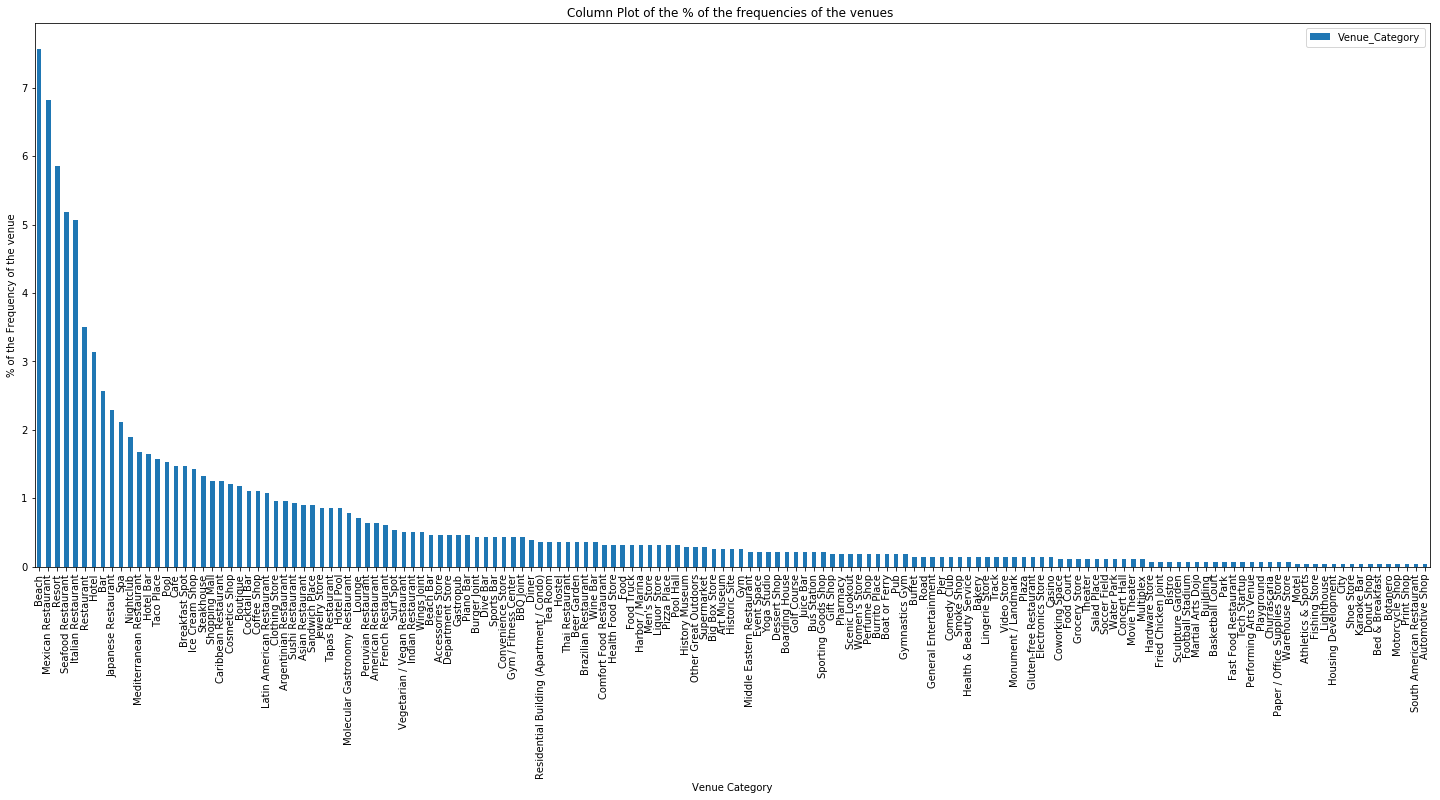

In [84]:
ax=df_v.plot(kind='bar', figsize=(25, 10))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('% of the Frequency of the venue') # add y-label to the plot
plt.title('Column Plot of the % of the frequencies of the venues ') # add title to the plot


plt.show()

DISCUSSION FOR NEXT STEPS (WEEK 2 /PART 2)------------------

From the previous categories of the venues, level of prices and the restaurants, I pretend to use an one hot encoding technique to obtain a matrix of one and zeros of each category table if they do not have yet, then after calculating the mean of the frequency of occurrence of each category if apply, I will join all the data in one dataframe.

Next, from the obtained data set I will use K-means algorithm to obtain clusters that could categorize the restaurants given the categories. After obtaining the optimal K parameter with the Elbow method, I will plot the locations of the cluster in a map with forum library, so that any person will see if the categorized clusters can be related to their aspirations on stablishing a new restaurant or taking a decision. It is hoped that the information given will help in the strategy of a long living company of "Food and beverage".


The presented notebook was created for academic pourposes.